# Google Colab 한글 폰트 설치

In [133]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [134]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


- 테스트

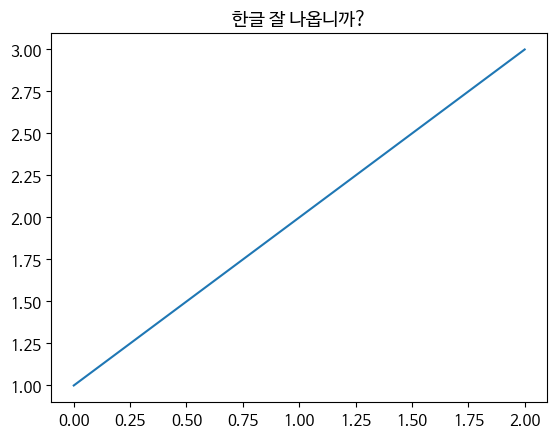

In [135]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

# Google Colab과 드라이브 연동

In [136]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 시계열 데이터
- 일정 시간 간격으로 배치된 데이터셋

## pandas 시간을 클래스, Timestamp

In [137]:
import pandas as pd
ts = pd.to_datetime("2024-10-11")
print(type(ts), ts)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2024-10-11 00:00:00


In [138]:
import pandas as pd
ts = pd.to_datetime("2024-10-11 09:33:00")
print(type(ts), ts)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2024-10-11 09:33:00


In [139]:
import pandas as pd
ts = pd.to_datetime("2024-10-11 090000")
print(type(ts), ts)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2024-10-11 09:00:00


## 나라마다 다른 날짜 표기법
- 우리나라 : 연도/월/일
- 미국 : 월/일/연도
- 영국 : 일/월/연도

In [140]:
import pandas as pd

# 미국식 표기법, 잘 나옴
ts = pd.to_datetime("06/07/20") # 2020년 6월 7일
print(type(ts), ts)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2020-06-07 00:00:00


In [141]:
import pandas as pd

# 영국식으로 시도하다가 실패함
ts = pd.to_datetime("07/06/20") # 2020년 6월 7일
print(type(ts), ts)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2020-07-06 00:00:00


In [142]:
import pandas as pd

# 영국식 일/월/연도
ts = pd.to_datetime("07/06/20", format='%d/%m/%y') # 2020년 6월 7일
print(type(ts), ts)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2020-06-07 00:00:00


## Timestamp 클래스 속성 활용

In [143]:
# Timestamp 클래스 안의 속성을 활용해서 연도, 월, 요일, 시분초
ts = pd.to_datetime("2024-10-11 09:45:10")
print(ts)
print(ts.second)
print(ts.dayofyear)

2024-10-11 09:45:10
10
285


In [144]:
# 날짜를 다시 원래 문자로 변환
ts.strftime("%Y-%m-%d")

'2024-10-11'

In [145]:
ts.strftime("%m-%d-%Y")

'10-11-2024'

## Timedelta
- 시간 연산

In [146]:
ts1 = pd.to_datetime("2024-10-10 09:45:10")

In [147]:
# ts + ts1 # Timestamp 클래스끼리는 연산 안됨

In [148]:
temp = pd.Timedelta(days = 100, hours = 2, minutes = 30, seconds = 30)
type(temp), temp

(pandas._libs.tslibs.timedeltas.Timedelta, Timedelta('100 days 02:30:30'))

In [149]:
ts - temp

Timestamp('2024-07-03 07:14:40')

In [150]:
dates = ['2024-10-09', '2023-10-10', '2024-10-11']
idx = pd.to_datetime(dates)
idx # 인덱싱, 슬라이싱 가능

DatetimeIndex(['2024-10-09', '2023-10-10', '2024-10-11'], dtype='datetime64[ns]', freq=None)

In [151]:
idx[0:2]

DatetimeIndex(['2024-10-09', '2023-10-10'], dtype='datetime64[ns]', freq=None)

In [152]:
idx.year, idx.month, idx.day

(Index([2024, 2023, 2024], dtype='int32'),
 Index([10, 10, 10], dtype='int32'),
 Index([9, 10, 11], dtype='int32'))

## Unix Time (유닉스 시간)
- 1970년 1월 1일, 표준시간 하나 정함

In [153]:
# 1628899200 ==> 1970년 1월 1일부터 경과한 시간을 초로 환산하야 정수로 나타냄
day = 1628899200 / 60 / 60 / 24
year = day / 365
year # 1970년부터 51년이 지남, 0.65

51.652054794520545

In [154]:
dt = pd.to_datetime(1628899200, unit = 's')
print(dt)

2021-08-14 00:00:00


## 데이터프레임 연습

In [155]:
data = [
    {'시가': 100, '고가': 110, '저가': 90, '종가': 105},
    {'시가': 100, '고가': 112, '저가': 80, '종가':  95},
    {'시가':  99, '고가': 115, '저가': 70, '종가':  85},
    {'시가':  70, '고가':  80, '저가': 60, '종가':  75},
]

df = pd.DataFrame(data, index=['20200615', '20200616', '20200717', '20200718'])
df

,시가,고가,저가,종가
20200615,100,110,90,105
20200616,100,112,80,95
20200717,99,115,70,85
20200718,70,80,60,75


In [156]:
# 조건식
cond = df.index.str[:6] == "202006"
df.loc[cond]

,시가,고가,저가,종가
20200615,100,110,90,105
20200616,100,112,80,95


## 날짜 변환

In [157]:
df.index = pd.to_datetime(df.index)
df.loc['2020-06']

,시가,고가,저가,종가
2020-06-15,100,110,90,105
2020-06-16,100,112,80,95


In [158]:
# 조건식 vs pd.to_datetime 비교
"""
cond = df.index.str[:6] == "202006"
df.loc[cond]

df.index = pd.to_datetime(df.index)
df.loc['2020-06']
"""

'\ncond = df.index.str[:6] == "202006"\ndf.loc[cond]\n\ndf.index = pd.to_datetime(df.index)\ndf.loc[\'2020-06\']\n'

# KRX API 크롤링
- 쉬운 방법

In [159]:
!pip install pykrx -q

In [160]:
import pykrx
print(pykrx.__version__)

1.0.48


## 티커

In [161]:
from pykrx import stock

tickers = stock.get_market_ticker_list("20241010")
print(len(tickers), tickers)

958 ['095570', '006840', '027410', '282330', '138930', '001460', '001465', '001040', '079160', '00104K', '000120', '011150', '011155', '001045', '097950', '097955', '000480', '000590', '012030', '016610', '005830', '000990', '139130', '001530', '000210', '000215', '375500', '37550L', '37550K', '007340', '004840', '155660', '069730', '017860', '017940', '365550', '383220', '007700', '114090', '078930', '006360', '001250', '007070', '078935', '012630', '039570', '089470', '294870', '009540', '267250', '267270', '443060', '071970', '010620', '322000', '042670', '267260', '329180', '097230', '014790', '003580', '204320', '060980', '011200', '035000', '002460', '487570', '298050', '003560', '175330', '234080', '001060', '001067', '001065', '096760', '105560', '432320', '002380', '344820', '009070', '009440', '119650', '092220', '003620', '016380', '001390', '033180', '015590', '001940', '025000', '092230', '000040', '044450', '030200', '033780', '058850', '058860', '093050', '003550', '0342

In [162]:
tickers = stock.get_market_ticker_list(market='KOSDAQ')
print(len(tickers), tickers)

1754 ['060310', '054620', '265520', '211270', '109960', '139050', '126600', '013720', '083790', '035760', '311690', '051500', '058820', '023460', '056730', '065770', '083660', '456440', '477760', '099520', '060900', '290120', '025440', '068790', '241520', '180400', '245620', '037370', '050120', '214270', '130500', '900290', '083450', '297890', '440290', '078150', '195940', '028300', '278650', '067630', '024850', '047920', '115450', '046210', '403870', '036640', '439730', '442770', '448760', '467930', '469480', '095340', '950170', '067290', '035900', '318000', '024840', '024120', '455250', '458320', '464680', '476470', '478390', '486630', '021320', '036670', '044180', '046440', '151860', '035600', '226360', '111870', '060720', '058400', '101000', '122450', '052900', '376190', '061970', '309960', '225190', '060370', '417200', '078020', '476080', '086960', '038340', '160550', '053290', '060250', '104200', '222160', '024940', '218410', '327260', '091340', '419530', '019550', '950110', '036

In [163]:
tickers = stock.get_index_ticker_list("20241010")
print(tickers)

['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1024', '1025', '1026', '1027', '1028', '1034', '1035', '1150', '1151', '1152', '1153', '1154', '1155', '1156', '1157', '1158', '1159', '1160', '1167', '1182', '1224', '1227', '1232', '1244', '1894']


In [164]:
tickers = stock.get_index_ticker_list("20241010")
print(tickers)

for t in tickers:
  name = stock.get_index_ticker_name(t)
  print(t, name)

['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1024', '1025', '1026', '1027', '1028', '1034', '1035', '1150', '1151', '1152', '1153', '1154', '1155', '1156', '1157', '1158', '1159', '1160', '1167', '1182', '1224', '1227', '1232', '1244', '1894']
1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물
1011 철강금속
1012 기계
1013 전기전자
1014 의료정밀
1015 운수장비
1016 유통업
1017 전기가스업
1018 건설업
1019 운수창고업
1020 통신업
1021 금융업
1024 증권
1025 보험
1026 서비스업
1027 제조업
1028 코스피 200
1034 코스피 100
1035 코스피 50
1150 코스피 200 커뮤니케이션서비스
1151 코스피 200 건설
1152 코스피 200 중공업
1153 코스피 200 철강/소재
1154 코스피 200 에너지/화학
1155 코스피 200 정보기술
1156 코스피 200 금융
1157 코스피 200 생활소비재
1158 코스피 200 경기소비재
1159 코스피 200 산업재
1160 코스피 200 헬스케어
1167 코스피 200 중소형주
1182 코스피 200 초대형제외 지수
1224 코스피 200 비중상한 30%
1227 코스피 200 비중상한 25%
1232 코스피 200 비중상한 20%
1244 코스피200제외 코스피지수
1894 코스피 200 TOP 1

In [165]:
df = stock.get_market_ohlcv("20240401", "20241010", "005930")
print(df.head(3))

               시가     고가     저가     종가       거래량       등락률
날짜                                                        
2024-04-01  83200  83300  82000  82000  20116513 -0.485437
2024-04-02  82900  85000  82900  85000  37077944  3.658537
2024-04-03  84300  85000  83500  84100  30493347 -1.058824


In [166]:
print(df.tail(3))

               시가     고가     저가     종가       거래량       등락률
날짜                                                        
2024-10-07  60200  61900  59500  61000  35066533  0.660066
2024-10-08  60000  61000  59900  60300  27411786 -1.147541
2024-10-10  60100  60200  58900  58900  45262214 -2.321725


In [167]:
stock.get_market_ticker_list("20190225")[:5]

['095570', '068400', '006840', '027410', '282330']

- 첫번째 미션, 난수 생성
- 두번째 미션, ticker에 매칭되는 종목명도 같이 출력(진행 ㄱㄱ)

In [168]:
# 이 코드 활용
for ticker in stock.get_market_ticker_list():
        종목 = stock.get_market_ticker_name(ticker)
        print(종목)

AJ네트웍스
AK홀딩스
BGF
BGF리테일
BNK금융지주
BYC
BYC우
CJ
CJ CGV
CJ4우(전환)
CJ대한통운
CJ씨푸드
CJ씨푸드1우
CJ우
CJ제일제당
CJ제일제당 우
CR홀딩스
CS홀딩스
DB
DB금융투자
DB손해보험
DB하이텍
DGB금융지주
DI동일
DL
DL우
DL이앤씨
DL이앤씨2우(전환)
DL이앤씨우
DN오토모티브
DRB동일
DSR
DSR제강
DS단석
E1
ESR켄달스퀘어리츠
F&F
F&F홀딩스
GKL
GS
GS건설
GS글로벌
GS리테일
GS우
HDC
HDC랩스
HDC현대EP
HDC현대산업개발
HD한국조선해양
HD현대
HD현대건설기계
HD현대마린솔루션
HD현대마린엔진
HD현대미포
HD현대에너지솔루션
HD현대인프라코어
HD현대일렉트릭
HD현대중공업
HJ중공업
HL D&I
HLB글로벌
HL만도
HL홀딩스
HMM
HS애드
HS화성
HS효성
HS효성첨단소재
IHQ
JB금융지주
JW생명과학
JW중외제약
JW중외제약2우B
JW중외제약우
JW홀딩스
KB금융
KB스타리츠
KCC
KCC글라스
KCTC
KC그린홀딩스
KC코트렐
KEC
KG모빌리티
KG스틸
KG케미칼
KH 필룩스
KIB플러그에너지
KISCO홀딩스
KPX케미칼
KPX홀딩스
KR모터스
KSS해운
KT
KT&G
KTcs
KTis
LF
LG
LG디스플레이
LG생활건강
LG생활건강우
LG에너지솔루션
LG우
LG유플러스
LG이노텍
LG전자
LG전자우
LG헬로비전
LG화학
LG화학우
LIG넥스원
LS
LS ELECTRIC
LS네트웍스
LS에코에너지
LX세미콘
LX인터내셔널
LX하우시스
LX하우시스우
LX홀딩스
LX홀딩스1우
MH에탄올
NAVER
NHN
NH올원리츠
NH투자증권
NH투자증권우
NH프라임리츠
NICE
NICE평가정보
NI스틸
NPC
NPC우
OCI
OCI홀딩스
PI첨단소재
POSCO홀딩스
S-Oil
S-Oil우
SBS
SGC에너지
SG글로벌
SG세계물산
SHD
SH에너지화학
SIMPAC
SJG세종
SJM
SJM홀딩스
SK
SKC
SK가스
SK네트웍스
SK디스커버리
SK디스커버리우
SK디앤디


In [169]:
"""
import time
import random
for ticker in stock.get_market_ticker_list("20190225")[:5]:
    df = stock.get_market_ohlcv("20181210", "20181212", ticker)
    종목 = stock.get_market_ticker_name(ticker)
    df['종목명'] = 종목
    print(df.head())
    time.sleep(random.randint(10, 20))
"""

              시가    고가    저가    종가     거래량       등락률     종목명
날짜                                                          
2018-12-10  4840  4840  4670  4750   32310 -2.061856  AJ네트웍스
2018-12-11  4685  4750  4585  4585   37975 -3.473684  AJ네트웍스
2018-12-12  4605  4605  4520  4540  102752 -0.981461  AJ네트웍스
               시가     고가     저가     종가     거래량       등락률    종목명
날짜                                                             
2018-12-10  12900  13200  12750  13000  206925 -0.763359  SK렌터카
2018-12-11  13100  13100  12500  12550  206669 -3.461538  SK렌터카
2018-12-12  12650  13150  12450  13150  213365  4.780876  SK렌터카
               시가     고가     저가     종가    거래량       등락률    종목명
날짜                                                            
2018-12-10  55400  56200  54900  55800  28618  0.722022  AK홀딩스
2018-12-11  55800  56200  54900  55100  24302 -1.254480  AK홀딩스
2018-12-12  55400  55900  54900  55900  13179  1.451906  AK홀딩스
              시가    고가    저가    종가     거래량       등락률  종목명
날짜

# 열린데이터광장 API

In [195]:
SERVICE_KEY = '78577a466b6a686a3539434662496e'
url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/1/5/'
print(url)

http://openapi.seoul.go.kr:8088/78577a466b6a686a3539434662496e/json/tbLnOpendataRtmsV/1/5/


In [196]:
import requests
import pandas as pd # 크롤링의 종착지 ==> pandas 데이터프레임

req = requests.get(url)
req

<Response [200]>

In [197]:
type(req)

requests.models.Response

In [198]:
content = req.json()
type(content)

dict

In [199]:
result = content['tbLnOpendataRtmsV']['row']
len(result)

5

In [200]:
pd.DataFrame(result)

,RCPT_YR,CGG_CD,CGG_NM,STDG_CD,STDG_NM,LOTNO_SE,LOTNO_SE_NM,MNO,SNO,BLDG_NM,...,THING_AMT,ARCH_AREA,LAND_AREA,FLR,RGHT_SE,RTRCN_DAY,ARCH_YR,BLDG_USG,DCLR_SE,OPBIZ_RESTAGNT_SGG_NM
0,2024,11350,노원구,10600,중계동,1,대지,0505,0000,롯데(505),...,72000,72.49,0.00,14.0,,20241009,1989,아파트,중개거래,서울 노원구
1,2024,11230,동대문구,10600,장안동,1,대지,0385,0002,리치,...,28100,75.48,0.00,3.0,,,2008,아파트,직거래,
2,2024,11620,관악구,10100,봉천동,1,대지,0869,0006,서울대역 마에스트로,...,15000,20.50,31.64,10.0,,,2012,오피스텔,중개거래,서울 관악구
3,2024,11740,강동구,10200,고덕동,1,대지,0486,0000,아남1,...,114000,84.91,0.00,10.0,,,1996,아파트,중개거래,서울 강동구
4,2024,11530,구로구,10200,구로동,1,대지,1256,0000,구로현대,...,48000,56.49,0.00,5.0,,,1992,아파트,중개거래,서울 양천구
